# Assignment 4
#  Question 2
# a)
### i.
Load the data, and devide the data into two group according the nominal class

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc, precision_recall_curve,confusion_matrix

# load the data
missing_values = ["n/a", "na", "--"]
df = pd.read_csv('assigData4.csv', na_values = missing_values)

#assign column name to the dataframe
df.columns = [np.arange(1,len(df.columns)+1)]
feature_cols = list(df.columns)
del feature_cols[len(feature_cols)-1]

x = df[feature_cols]
y = df[(len(df.columns),)]

#devide the plot in two group based on the label
index = np.where( y== 1, True, False)

P_df = df[index]
N_df = df[np.invert(index)]

### ii.
Plot the distribution of feature 15 for the two classes on a single histogram.

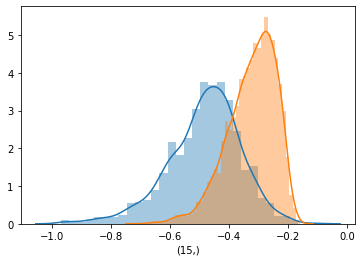

In [2]:
#Plot the distribution of feature 15
F1_15 = P_df[(15,)]
F0_15 = N_df[(15,)]

sns.distplot(F1_15)
sns.distplot(F0_15)

### iii.
Plot a scatterplot illustrating the correlation between features 3 and 8, colouring the data by
class.

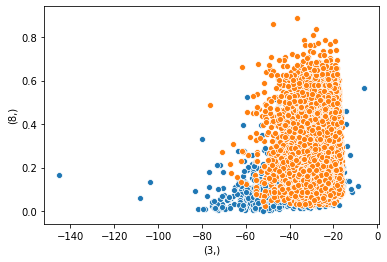

In [3]:
#Plot a scatterplot illustrating the correlation between features 3 and 8
sns.scatterplot(x = (3,), y = (8,), data = P_df[[(3,),(8,)]])
sns.scatterplot(x = (3,), y = (8,), data = N_df[[(3,),(8,)]])

From the scatter plots of feature 3 and feature 8 in two different categories, we can't draw their relevance out.

## b)
### i.
Describe the SelectKBest approach using the chi metric:\
SelectKBest will compute the chi2 statistic between each feature of X and y (assumed to be class labels), therefore finally we will get a chi metric. In the metric, small value means the feature is independent of y. A large value will mean the feature is may related to y, and so likely to provide important information. Only k features will be retained. 
In general, SelectKBest simply retains the first k features of X with the highest scores.
### ii.
#### i.
Variance Threshold
Variance thresholds remove features whose values don’t change much from observation to observation (i.e. their variance falls below a threshold). These features provide little value. \
I set the parameter threshold to 0.9, which means that the features with variance less of 0.9 will be discarded.
#### ii.
Summarize the results:

In [4]:
def Variance_threshold_selector(data, threshold = 0.9):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    print("the number of features being selected is :", len(selector.get_support(indices = True)))
    print("The selected features are: feature ",selector.get_support(indices = True))
    return data[data.columns[selector.get_support(indices = True)]]

x_optimal = Variance_threshold_selector(x)

the number of features being selected is : 133
The selected features are: feature  [  0   2   9  10  11  16  18  20  21  22  23  24  26  30  31  32  33  38
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 178 179 200 201 202
 203 204 205 206 207 208 209]


## c)
### i.
We need to set the parameters of features and labels.
Features: a feature is an individual measurable property or characteristic of a phenomenon being observed.
Labels: Labels are the final output. You can also consider the output classes to be the labels.
### ii.
Stratified random sampling divides a population into subgroups or strata, and random samples are taken, in proportion to the population, from each of the strata created.\
Here we can split the data into five groups and choose one of the groups as a test dataset, and the rest of the data can be a training dataset.
### iii.
First, we split the data into training and testing dataset for both the original features and the optimal features, and use naive Bayes classifier for both as well.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
xo_train, xo_test, yo_train, yo_test = train_test_split(x_optimal, y, test_size = 0.2, random_state = 42)

# shape of the dataset
print('Shape of training data :',x_train.shape)
print('Shape of testing data :',x_test.shape)


model = GaussianNB()
model.fit(x_train,y_train)
NB_probs = model.predict_proba(x_train)

model_optimal = GaussianNB()
model_optimal.fit(xo_train, yo_train)
NBo_probs = model_optimal.predict_proba(xo_train)

Shape of training data : (5759, 215)
Shape of testing data : (1440, 215)


We set a funciton which can conduct a 5-fold cross-validation test. Provide the
confusion matrix, the accuracy, the precision, the sensitivity, and the specificity. Generate a
ROC curve and a precision-recall curve.

In [6]:
def model_evaluation(model,x,y,y_probs,k):
    y_pred = cross_val_predict(model, x, y, cv = k)
    scores = cross_val_score(model, x, y, cv = k)
    
    conf_mat = confusion_matrix(y, y_pred)
    
    TN,FP,FN,TP = conf_mat.ravel()
    SUM = TP+FP+FN+TN
    accuracy = (TP+TN)/(SUM)
    Sn = TP/(TP+FN)
    Sp = TN/(TN+FP)
    
    print("the confusion table is :\n", conf_mat)
    print("accracy is :",accuracy)
    print("sensitivity is :", Sn)
    print("specificity is :", Sp)
    
    precision, recall, threshold = precision_recall_curve(y,y_pred)
    plt.plot(recall, precision)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.title('precision-recall curve')
    plt.show()
    
    scores = y_probs[:,1]
    fpr, tpr, thresholds = roc_curve(y,scores)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()    
    
    auc_1 = auc(fpr,tpr)
    print("AUC is : ", auc_1)

For the original feature set (215 features):

the confusion table is :
 [[4621  187]
 [ 153  798]]
accracy is : 0.9409619725646814
sensitivity is : 0.8391167192429022
specificity is : 0.9611064891846922


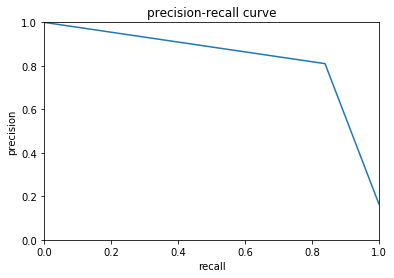

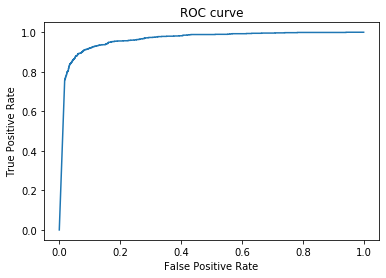

AUC is :  0.9634006851532059


In [7]:
model_evaluation(model, x_train, y_train, NB_probs, 5)

### iv.
For the optimal feature set (133 features):

the confusion table is :
 [[4640  168]
 [ 170  781]]
accracy is : 0.9413092550790068
sensitivity is : 0.8212407991587802
specificity is : 0.9650582362728786


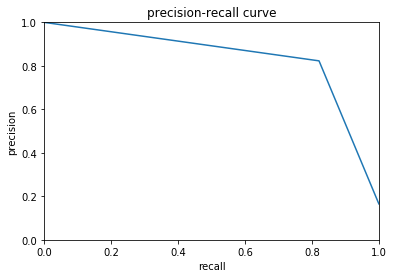

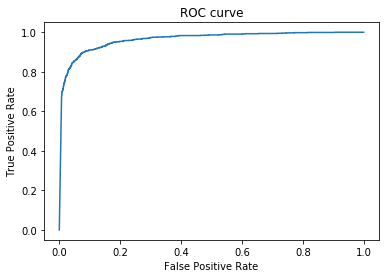

AUC is :  0.9639466775493352


In [8]:
model_evaluation(model_optimal, xo_train, yo_train, NBo_probs, 5)

### v.
As for performance metrics:
We set up a function that will calculate the confusion table and accuracy from the given model and dataset

In [9]:
def performance(model, x, y_true):
    y_pred = model.predict(x)
    conf_table = confusion_matrix(y_true, y_pred)
    accuracy = (conf_table[0][0]+conf_table[1][1])/(sum(sum(conf_table)))
    print("The confusion table is :\n", conf_table)
    print("The accuracy is :", accuracy)

The performance on the training data led by original feature set.

In [10]:
performance(model, x_train, y_train)

The confusion table is :
 [[4622  186]
 [ 147  804]]
The accuracy is : 0.9421774613648203


The performance on the test data led by original feature set.

In [11]:
performance(model, x_test, y_test)

The confusion table is :
 [[1145   47]
 [  39  209]]
The accuracy is : 0.9402777777777778


The performance on the training data led by optimal feature set.

In [12]:
performance(model_optimal, xo_train, yo_train)

The confusion table is :
 [[4637  171]
 [ 170  781]]
The accuracy is : 0.9407883313075187


The performance on the test data led by optimal feature set.

In [13]:
performance(model_optimal, xo_test, yo_test)

The confusion table is :
 [[1146   46]
 [  42  206]]
The accuracy is : 0.9388888888888889


The optimal feature set let to the best performance. 
1. It has a higher AUC in the cross-validation test.
2. It has similar accuracy of the original feature set in both train and test data but with less number of features, which reduces the probability of overfitting